In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def intensity_function(base_intensity,time_influence, x):
    #x = np.arange(0,max_time, 0.01)
    time_influence += 1e-8
    past_influence = 0. *x
    current_influence = time_influence * x#T

    term1 = past_influence + current_influence + base_intensity
    term2 = np.exp(past_influence + base_intensity)
    term3 = np.exp(term1)

    log_f_t = term1 + \
        (1./(time_influence)) * (term2-term3)
    return np.exp(log_f_t)

#print(intensity_function(1,0,1))

    

<IPython.core.display.Javascript object>


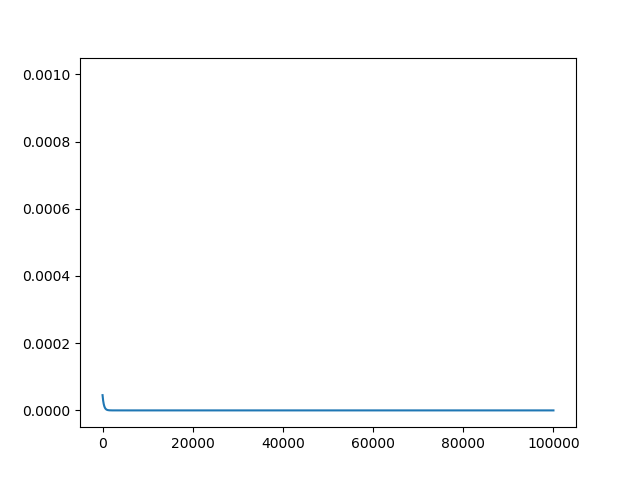

interactive(children=(FloatSlider(value=-7.0, description='base', min=-100.0, step=1.0), FloatSlider(value=0.0…

<function __main__.update(base=0, ti=0.0, max_t=1.0)>

In [3]:
x = np.arange(100000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.abs(.001*np.sin(x)))

def update(base =0, ti =0., max_t = 1.):
    x = np.arange(0,max_t, max_t/100000)
    y = intensity_function(base, ti, x)
    line.set_ydata(y)
    fig.canvas.draw()

#interact(update);
interact(update, base = widgets.FloatSlider(value=-7.,min=-100,max=100.0,step=1),\
         ti = widgets.FloatSlider(value=0.005,min=-10,max=10.0,step=0.1), \
        max_t = widgets.FloatSlider(value=1000,min=1,max=4000.0,step=1))